# **1. Perkenalan Dataset**


Link : https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

**Deskripsi** <br>

Dataset ini memberikan gambaran komprehensif tentang berbagai faktor yang memengaruhi kinerja siswa dalam ujian. Ini mencakup informasi tentang kebiasaan belajar, kehadiran, keterlibatan orang tua, dan aspek lain yang memengaruhi kesuksesan akademik.

**Deskripsi Kolom**

| Nama Kolom                | Deskripsi                                                                 |
|------------------------|---------------------------------------------------------------------------|
| Hours_Studied           | Jumlah jam yang dihabiskan untuk belajar per minggu.                      |
| Attendance              | Persentase kehadiran di kelas.                                            |
| Parental_Involvement    | Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi). |
| Access_to_Resources     | Ketersediaan sumber daya pendidikan (Rendah, Sedang, Tinggi).             |
| Extracurricular_Activities | Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak).                  |
| Sleep_Hours             |Rata-rata jumlah jam tidur per malam.                                     |
| Previous_Scores        | Skor dari ujian sebelumnya.                                               |
| Motivation_Level       | Tingkat motivasi siswa (Rendah, Sedang, Tinggi).                          |
| Internet_Access        | Ketersediaan akses internet (Ya, Tidak).                                  |
| Tutoring_Sessions      | Jumlah sesi bimbingan belajar yang dihadiri per bulan.                    |
| Family_Income          | Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi).                     |
| Teacher_Quality        | Kualitas guru (Rendah, Sedang, Tinggi).                                   |
| School_Type            | Jenis sekolah yang dihadiri (Negeri, Swasta).                             |
| Peer_Influence         | Pengaruh teman sebaya terhadap kinerja akademik (Positif, Netral, Negatif). |
| Physical_Activity      | Rata-rata jumlah jam aktivitas fisik per minggu.                          |
| Learning_Disabilities  | Keberadaan disabilitas belajar (Ya, Tidak).                               |
| Parental_Education_Level | Tingkat pendidikan tertinggi orang tua (SMA, Perguruan Tinggi, Pascasarjana). |
| Distance_from_Home     | Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh).                        |
| Gender                 | Jenis kelamin siswa (Laki-laki, Perempuan).                               |
| Exam_Score             | Skor ujian akhir.                                                         |

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

In [2]:
data = pd.read_csv('dataset_clustering.csv')

In [3]:
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **4. Exploratory Data Analysis (EDA)**

Dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset

### Struktur data

In [4]:
# ukuran data
data.shape

(6607, 20)

Data terdiri dari 6607 baris dan 20 kolom

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Tipe data tiap kolom sudah sesuai

In [6]:
# statistik deskriptif kolom numerik
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Dari tabel statistik deskriptif di atas, diperoleh:
- Nilai maksimum dari kolom `Exam_Score` tidak relevan. Karena pada dunia nyata, nilai ujian hanya akan berkisar dari angka 0-100, sehingga nilai 101 akan diganti dengan nilai 100.
- Nilai maksimum dari kolom `Hours_Studied`, `Tutoring_Sessions`, dan `Exam_Score` terlihat cukup jauh dari batas atas (75%), ini menandakan adanya outlier.

In [7]:
# statistik deskriptif kolom kategorik
data.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


Dari tabel statistik deskriptif di atas, kita dapat melihat jumlah nilai unik, modus, dan frekuensi modus muncul pada tiap kolom kategorik

### Missing value

In [8]:
# memeriksa missing value
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Terdapat missing value pada kolom `Teacher_Quality`, `Parental_Education_Level`, dan `Distance_from_Home`

### Analisis korelasi

In [9]:
# list yang berisikan kolom-kolom numerik
numerical_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]

print(numerical_cols)

['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


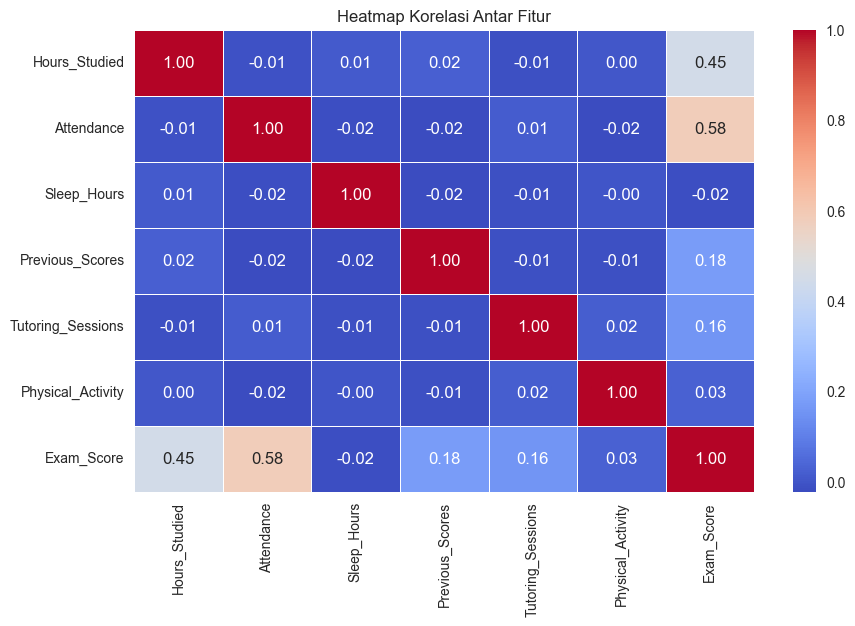

In [10]:
# korelasi antar kolom numerik
numerical_corr = data[numerical_cols].corr()

# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

**Interpretasi**

Dari heatmap di atas, diperoleh bahwa fitur `Hours_Studied` dan `Attendance` berkolerasi cukup kuat dengan fitur `Exam_Score`. Sedangkan sebagian besar fitur lainnya menunjukkan korelasi yang lemah. 

### Distribusi data fitur numerik

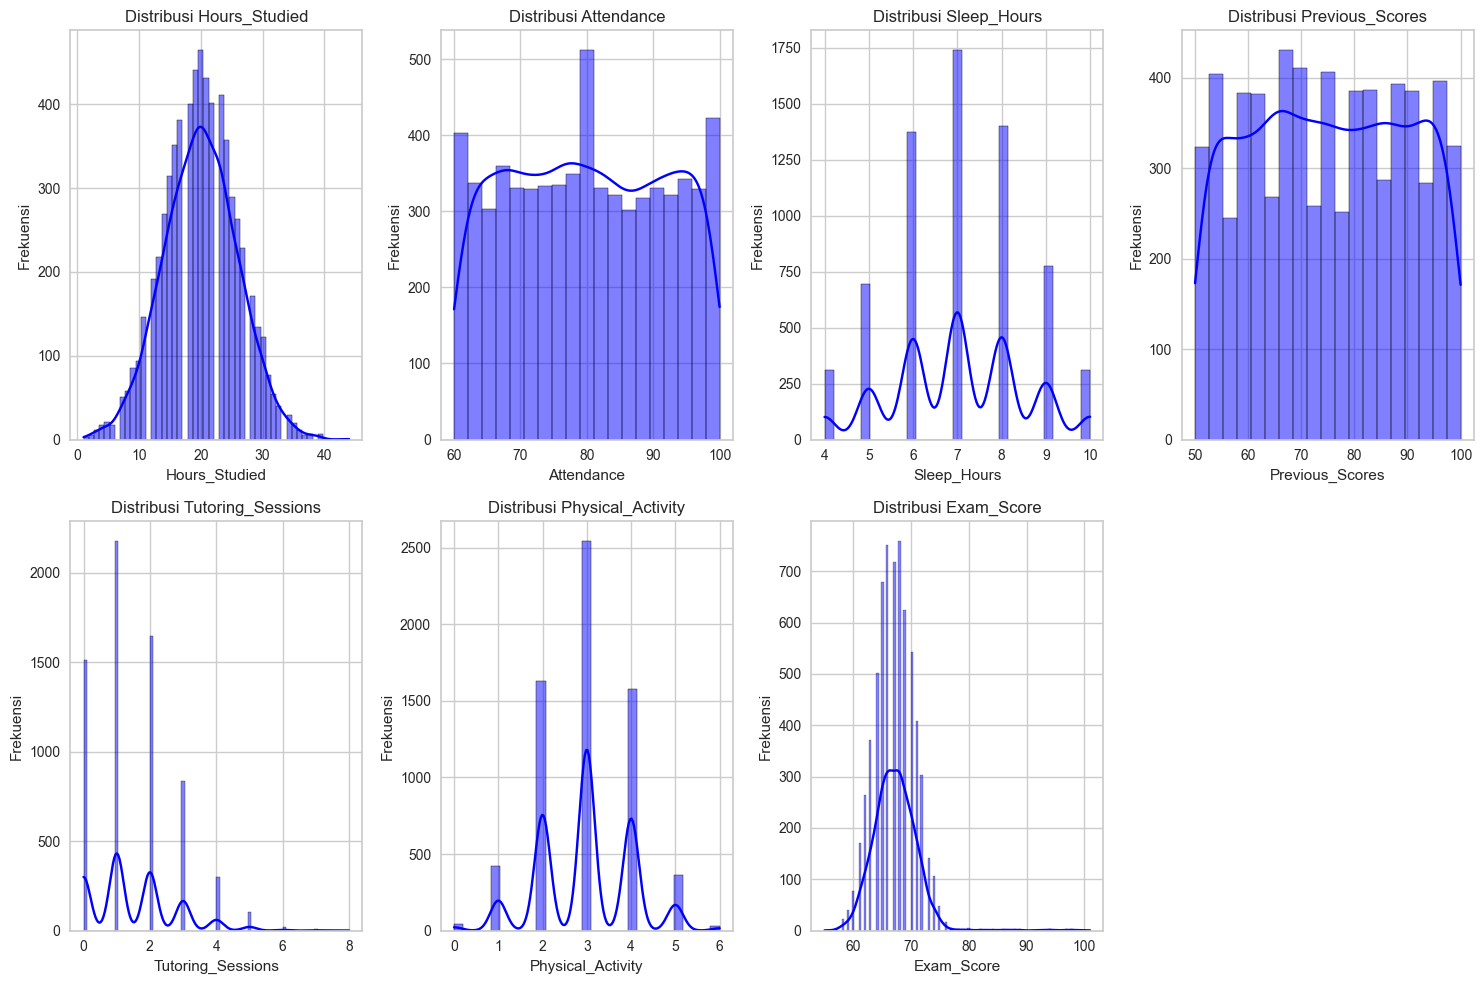

In [11]:
num_cols = len(numerical_cols)

n_rows = math.ceil(num_cols / 4)
n_cols = 4

# Membuat subplot
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

**Interpretasi**
1. **Hours_Studied** <br>
Distribusinya berbentuk distribusi normal yang cenderung simetris. Sebagian besar siswa belajar sekitar 10 hingga 20 jam per minggu, dengan jumlah siswa yang semakin sedikit untuk jumlah jam yang lebih tinggi. Ini menunjukkan bahwa mayoritas siswa menghabiskan waktu belajar yang moderat, sementara ada beberapa yang menghabiskan waktu lebih sedikit atau lebih banyak.

2. **Attendance** <br>
Distribusi fitur ini menunjukkan sebaran yang cukup merata dengan sedikit variasi. Mayoritas siswa hadir di kelas antara 60% hingga 100% dari waktu, namun ada beberapa siswa dengan tingkat kehadiran rendah. Kehadiran yang cenderung lebih tinggi ini mungkin mencerminkan kebijakan sekolah atau faktor lain yang mendukung kehadiran yang baik.

3. **Sleep_Hours** <br>
Distribusi `Sleep_Hours` menunjukkan pola dengan banyak siswa yang tidur antara 6 hingga 8 jam setiap malam. Ada puncak yang lebih kecil di sekitar 4 hingga 5 jam dan 9 hingga 10 jam, yang menunjukkan bahwa meskipun kebanyakan siswa tidur cukup, ada yang tidur lebih sedikit atau lebih banyak dari rata-rata.

4. **Previous_Scores** <br>
Distribusinya menunjukkan sebaran yang relatif rata di seluruh rentang skor (50 hingga 100), dengan sedikit penurunan pada nilai yang lebih tinggi. Ini menunjukkan bahwa siswa memiliki performa yang cukup beragam pada ujian sebelumnya, meskipun sebagian besar berada di kisaran nilai menengah.

5. **Tutoring_Sessions** <br>
Grafik distribusi menunjukkan bahwa sebagian besar siswa tidak mengikuti banyak sesi bimbingan (nilai dekat 0), dengan beberapa siswa yang mengikuti satu atau dua sesi bimbingan. Hanya sedikit siswa yang mengikuti lebih banyak sesi bimbingan.

6. **Physical_Activity** <br>
Distribusi dari `Physical_Activity` menunjukkan puncak di sekitar 2 hingga 3 jam per minggu, dengan sebagian besar siswa melakukan aktivitas fisik dalam kisaran ini. Beberapa siswa juga melakukan lebih banyak atau lebih sedikit aktivitas fisik, tetapi mereka relatif lebih sedikit.

7. **Exam_Score** <br>
Distribusi fitur ini menunjukkan bentuk distribusi normal yang cukup jelas, dengan sebagian besar siswa mendapatkan skor sekitar 60 hingga 80. Ada beberapa siswa yang mendapatkan skor lebih rendah atau lebih tinggi, tetapi jumlahnya lebih sedikit. Hal ini menunjukkan bahwa mayoritas siswa mendapatkan skor ujian yang sedang.

### Distribusi frekuensi fitur kategorik

In [12]:
# list yang berisikan kolom-kolom kategorik
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

print(categorical_cols)

['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


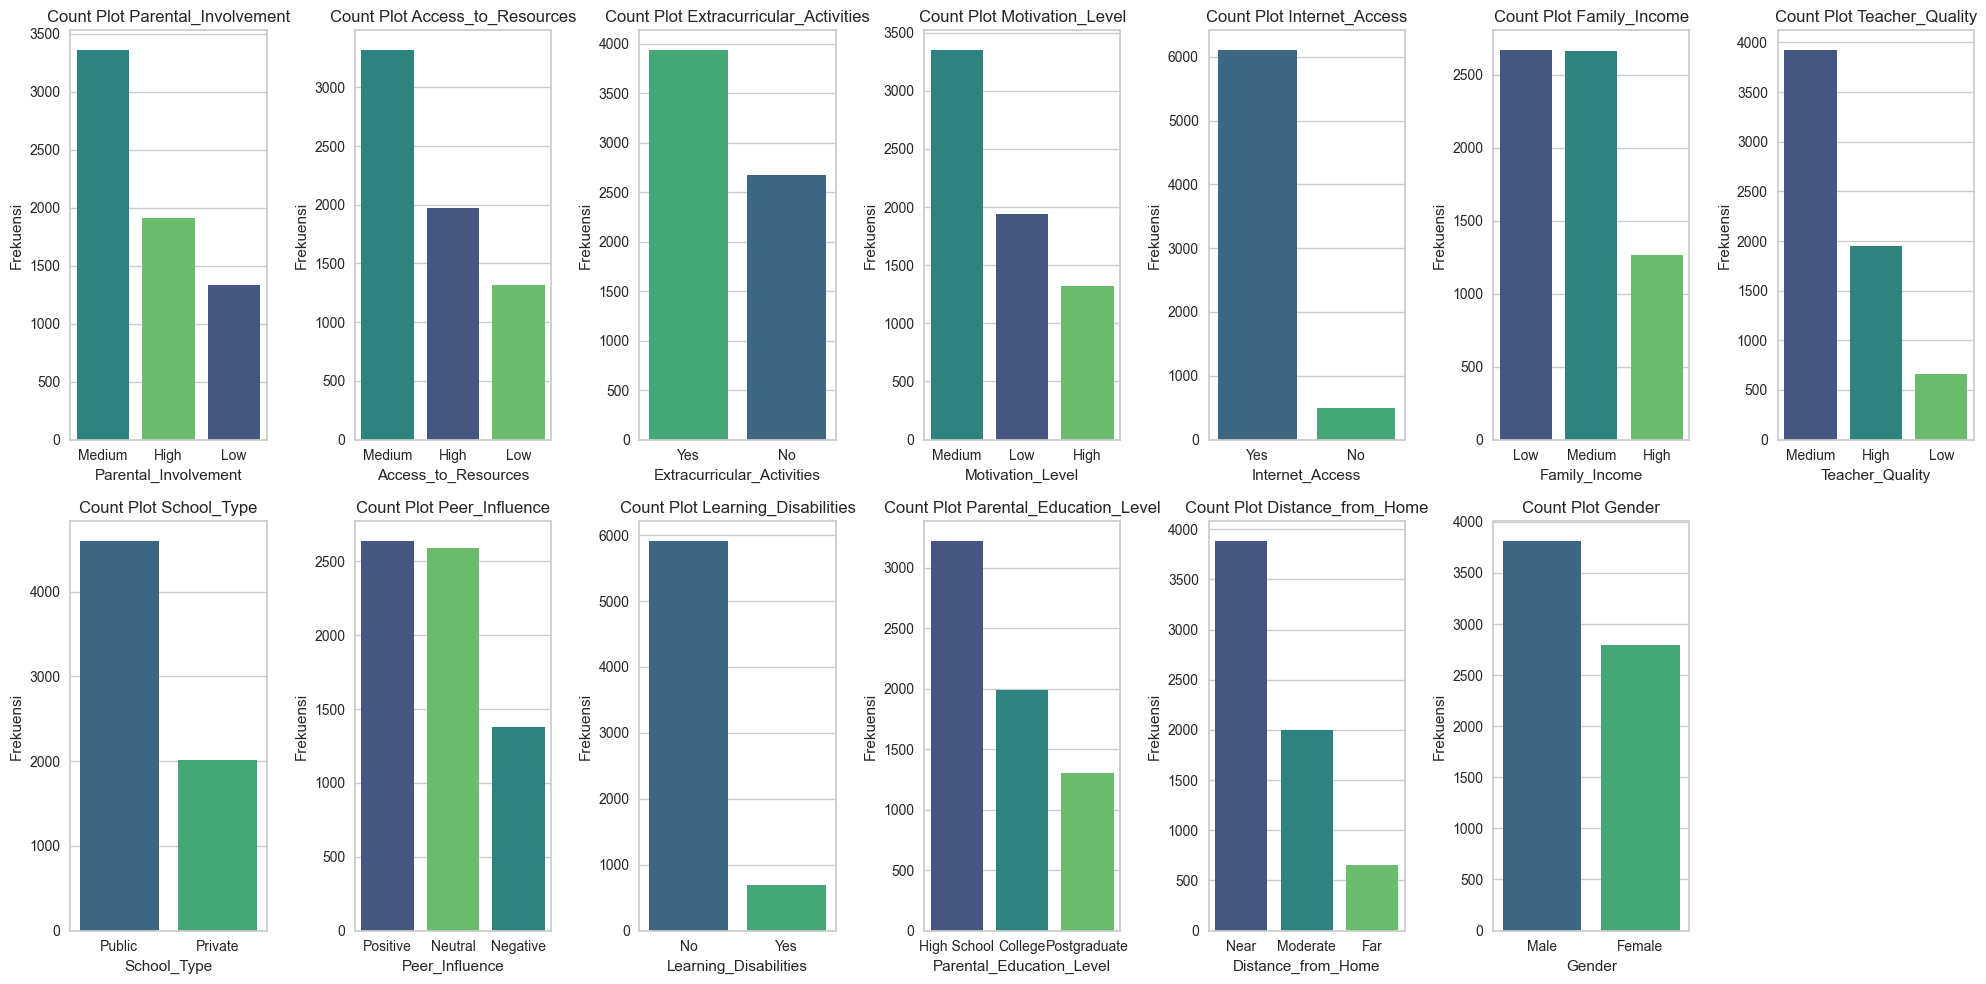

In [13]:
cat_cols = len(categorical_cols)

n_rows = math.ceil(cat_cols / 7)
n_cols = 7

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=data[col], hue=data[col], palette='viridis', order=data[col].value_counts().index, legend=False)
    plt.title(f'Count Plot {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

**Interpretasi**
1. **Parental_Involvement** <br>
Mayoritas siswa memiliki tingkat keterlibatan orang tua yang **sedang**, diikuti oleh **tinggi**, dan paling sedikit adalah **rendah**. Ini menunjukkan bahwa kebanyakan orang tua terlibat dengan tingkat moderat/sedang dalam pendidikan anak-anak mereka.

2. **Access_to_Resources** <br>
Sebagian besar siswa memiliki **akses sumber daya pendidikan tingkat sedang**, dengan jumlah yang sedikit lebih banyak di kategori **tinggi** dan **rendah**. Ini menunjukkan variasi dalam akses siswa terhadap sumber daya pendidikan.

3. **Extracurricular_Activities (Kegiatan Ekstrakurikuler)** <br>
Sebagian besar siswa terlibat dalam kegiatan ekstrakurikuler (**Yes**), sedangkan sisanya tidak terlibat (**No**). Hal ini menunjukkan bahwa kegiatan ekstrakurikuler cukup populer di kalangan siswa.

4. **Motivation_Level** <br>
Distribusi motivasi menunjukkan mayoritas siswa memiliki **motivasi tingkat sedang**, diikuti oleh **tinggi**, dan paling sedikit adalah **rendah**. Ini bisa menunjukkan bahwa mayoritas siswa cukup termotivasi dalam pendidikan mereka, meskipun ada sebagian yang kurang motivasi.

5. **Internet_Access** <br>
Sebagian besar siswa memiliki akses internet (**Yes**), dengan sebagian kecil yang tidak memiliki akses (**No**). Ini menunjukkan bahwa akses internet sangat umum di kalangan siswa.

6. **Family_Income** <br>
Distribusi pendapatan keluarga menunjukkan bahwa sebagian besar siswa berasal dari keluarga dengan **pendapatan sedang** dan **rendah**, sedangkan hanya sedikit siswa yang berasal dari keluarga dengan **pendapatan tinggi**.

7. **Teacher_Quality**<br>
Sebagian besar siswa berada di sekolah dengan **kualitas guru sedang**, diikuti oleh **kualitas guru tinggi**, dan sedikit di antaranya di sekolah dengan **kualitas guru rendah**.

8. **School_Type** <br>
Mayoritas siswa bersekolah di **sekolah negeri**, sementara hanya sebagian kecil yang bersekolah di **sekolah swasta**.

9. **Peer_Influence** <br>
Sebagian besar siswa dipengaruhi oleh teman sebaya dengan **pengaruh positif**, diikuti oleh **pengaruh netral**, dan sedikit yang dipengaruhi oleh teman sebaya dengan **pengaruh negatif**.

10. **Learning_Disabilities** <br>
Sebagian besar siswa tidak memiliki disabilitas belajar (**No**), sementara hanya sedikit yang memiliki disabilitas belajar (**Yes**).

11. **Parental_Education_Level** <br>
Sebagian besar orang tua memiliki pendidikan **SMA**, diikuti oleh **pendidikan perguruan tinggi**, dan sedikit yang memiliki pendidikan **pasca sarjana**.

12. **Distance _from_Home** <br>
Mayoritas siswa tinggal **dekat** dengan sekolah, diikuti oleh yang tinggal **sedang**, dan hanya sedikit yang tinggal **jauh** dari sekolah.

13. **Gender** <br>
Sebagian besar siswa adalah **laki-laki**, meskipun jumlah **perempuan** juga cukup bayak, tetapi jumlah siswa laki-laki sedikit lebih dominan.

### Proporsi kategori di setiap fitur kategorik

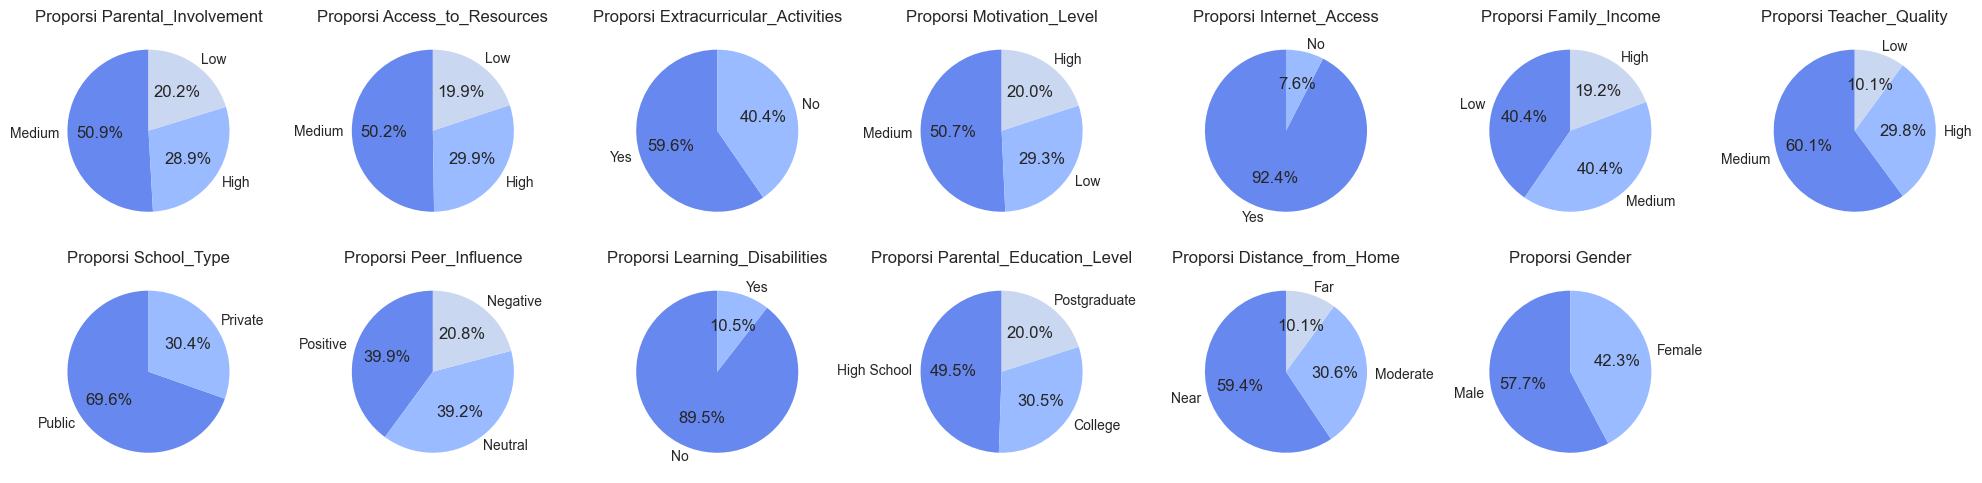

In [14]:
# Pie chart untuk kolom kategorikal
plt.figure(figsize=(20, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm'))
    plt.title(f'Proporsi {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Interpretasi**
1. **Parental_Involvement** <br>
Mayoritas siswa memiliki **keterlibatan orang tua yang sedang (Medium)** dengan proporsi 50.9%. Sebagian kecil memiliki **keterlibatan orang tua yang tinggi (High)** dan **rendah (Low)**.

2. **Access_to_Resources** <br>
Sebagian besar siswa memiliki **akses sumber daya yang sedang (Medium)** dengan proporsi 50.2%, diikuti oleh **akses tinggi (High)** dan **akses rendah (Low)**, meskipun perbedaannya tidak terlalu besar.

3. **Extracurricular_Activities** <br>
Sebagian besar siswa terlibat dalam **kegiatan ekstrakurikuler (Yes)** dengan proporsi 59.6%. Hanya 40.4% siswa yang tidak terlibat dalam kegiatan ekstrakurikuler (No).

4. **Motivation_Level** <br>
Sebagian besar siswa memiliki **motivasi sedang (Medium)** dengan proporsi 50.7%. Hanya 20% siswa yang memiliki **motivasi tinggi (High)**, dan sekitar 29.3% siswa memiliki **motivasi rendah (Low)**.

5. **Internet_Access** <br>
Sebagian besar siswa memiliki **akses internet (Yes)** dengan proporsi 92.4%. Hanya 7.6% siswa yang tidak memiliki **akses internet (No)**.

6. **Family_Income** <br>
Distribusi pendapatan keluarga relatif merata antara **pendapatan sedang (Medium)** dan **pendapatan rendah (Low)**, masing-masing dengan proporsi 40.4%. Hanya sekitar 19.2% siswa yang berasal dari keluarga dengan **pendapatan tinggi (High)**.

7. **Teacher_Quality** <br>
Sebagian besar siswa berada di sekolah dengan **kualitas guru sedang (Medium)** dengan proporsi 60.1%, diikuti oleh **kualitas guru tinggi (High)** (29.8%), dan sedikit yang memiliki **kualitas guru rendah (Low)** (10.1%).

8. **School_Type** <br>
Mayoritas siswa bersekolah di **sekolah negeri (Public)** dengan proporsi 69.6%, sementara hanya 30.4% yang bersekolah di **sekolah swasta (Private)**.

9. **Peer_Influence** <br>
Sebagian besar siswa dipengaruhi oleh teman sebaya dengan **pengaruh positif (Positive)** (39.9%) dan **pengaruh netral (Neutral)** (39.2%). Hanya sebagian kecil yang dipengaruhi oleh teman sebaya dengan **pengaruh negatif (Negative)** (20.8%).

10. **Learning_Disabilities** <br>
Sebagian besar siswa tidak memiliki disabilitas belajar (**No**) dengan proporsi 89.5%. Hanya 10.5% siswa yang memiliki disabilitas belajar (**Yes**).

11. **Parental_Education_Level** <br>
Sebagian besar orang tua memiliki tingkat pendidikan **SMA (High School)** dengan proporsi 49.5%, diikuti oleh orang tua dengan tingkat pendidikan **perguruan tinggi (College)** (30.5%) dan **pasca sarjana (Postgraduate)** (20%).

12. **Distance_from_Home** <br>
Sebagian besar siswa tinggal **dekat (Near)** dengan sekolah (59.4%), diikuti oleh siswa yang tinggal **sedang (Moderate)** (30.6%) dan sedikit yang tinggal **jauh (Far)** dari sekolah (10.1%).

13. **Gender** <br>
Distribusi jenis kelamin menunjukkan bahwa mayoritas siswa adalah **laki-laki (Male)** dengan proporsi 57.7%, sementara 42.3% adalah **perempuan (Female)**.

# **5. Data Preprocessing**

### Menangani missing value

In [15]:
# kolom dengan missing value
missing_value_cols = [col for col in data.columns if data[col].isnull().sum() > 0]

print(missing_value_cols)

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']


Ketiga kolom ini bertipe kategorik, sehingga **missing value akan diisi menggunakan modus**

In [16]:
# mengisi missing value dengan modus
for col in missing_value_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [17]:
# periksa kembali apakah masih ada missing value
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

**Missing value pada data sudah berhasil ditangani**

### Duplikasi data

In [18]:
# memeriksa duplikasi data
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

### Outlier

In [19]:
# Fungsi untuk membuat boxplot beberapa kolom secara bersamaan
def plot(data, columns):
    num_plots = len(columns)

    fig, axes = plt.subplots(1, num_plots, figsize=(40, 5))

    for i, col in enumerate(columns):
        axes[i].boxplot(data[col].dropna())
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

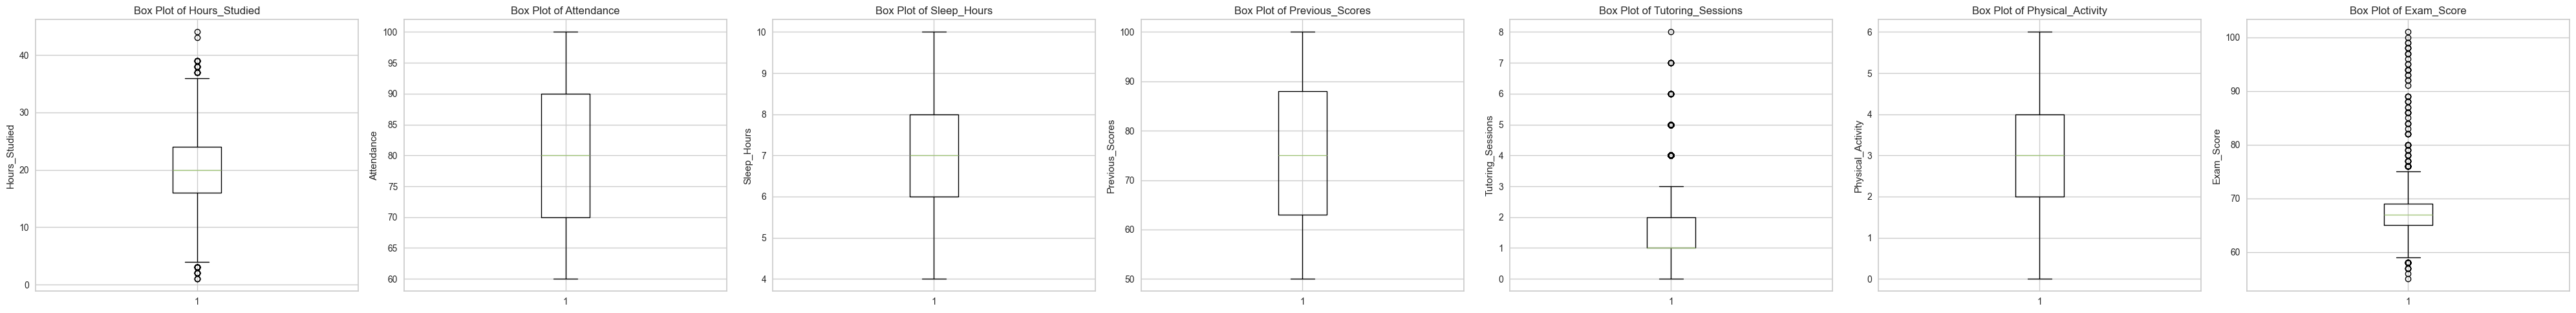

In [20]:
# memeriksa outlier menggunakan boxplot
plot(data, numerical_cols)

Dari boxplot di atas, terlihat kolom `Hours_Studied`, `Tutoring_Sessions`, dan `Exam_Score` memiliki outlier. Dengan mempertimbangkan bahwa tiap siswa memiliki kebiasaan belajar dan nilai ujian yang berbeda, maka **outlier tidak akan diubah/dihapus** selama nilai-nilai tersebut masih relevan.

### Menangani data tidak relevan

In [21]:
data[data['Exam_Score'] == 101]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [22]:
# ganti nilai 101 dengan 100
data.loc[data['Exam_Score'] == 101, 'Exam_Score'] = 100

### Normalisasi

In [23]:
df = data.copy()

scl = MinMaxScaler()
df[numerical_cols] = scl.fit_transform(data[numerical_cols])

### *Label encoding*

In [24]:
le = LabelEncoder()

# Labeling untuk setiap kolom kategorik
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,1,0,0,0.500000,0.46,1,1,0.000,1,2,1,2,0.500000,0,1,2,1,0.266667
1,0.418605,0.100,1,2,0,0.666667,0.18,1,1,0.250,2,2,1,0,0.666667,0,0,1,0,0.133333
2,0.534884,0.950,2,2,1,0.500000,0.82,2,1,0.250,2,2,1,1,0.666667,0,2,2,1,0.422222
3,0.651163,0.725,1,2,1,0.666667,0.96,2,1,0.125,2,2,1,0,0.666667,0,1,1,1,0.355556
4,0.418605,0.800,2,2,1,0.333333,0.30,2,1,0.375,2,0,1,1,0.666667,0,0,2,0,0.333333


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
# menggunakan algoritma KMeans 
kmeans = KMeans(init='k-means++', random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Menentukan jumlah cluster optimal

#### *Elbow method*

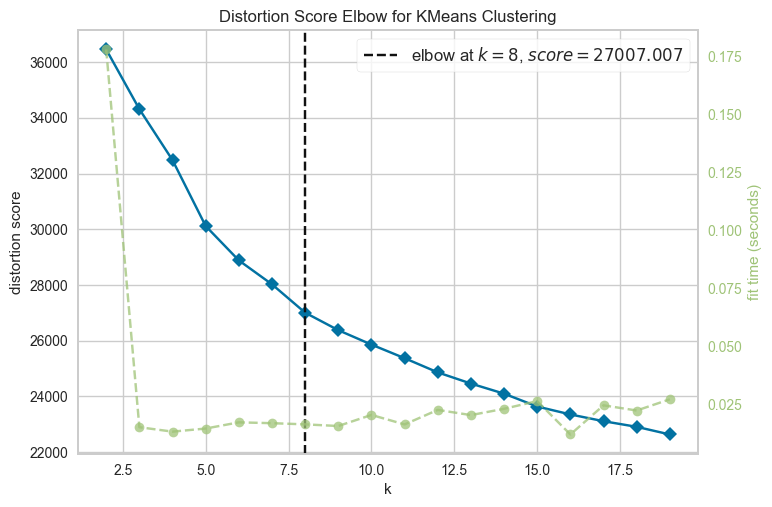

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# elbow method untuk mencari k optimal
visu1 = KElbowVisualizer(kmeans, k=(2, 20), locate_elbow=True)
visu1.fit(df)
visu1.show()

Dengan menggunakan *elbow method*, diperoleh jumlah cluster optimal sebesar 8

#### *Silhoutte score*

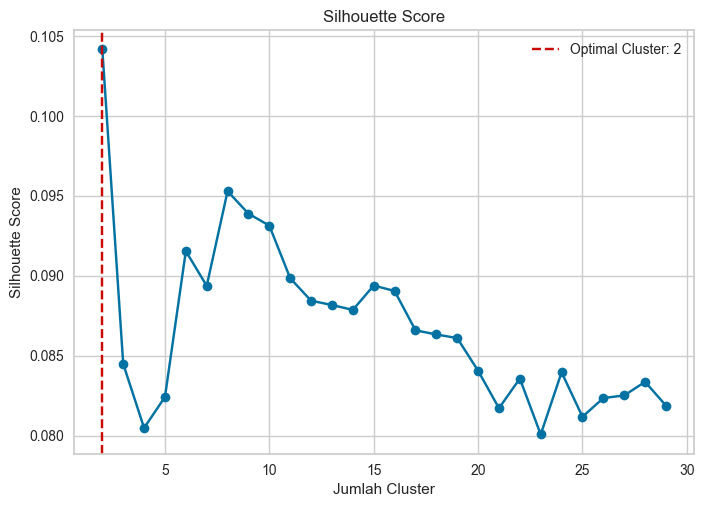

In [28]:
# silhoutte score untuk mencari k optimal
silhouette_scores = []
n_clusters_range = range(2, 30)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Temukan jumlah cluster dengan Silhouette Score tertinggi
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]

# Plot Silhouette Score
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Tambahkan garis putus-putus merah untuk menandakan jumlah cluster optimal
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label=f'Optimal Cluster: {optimal_n_clusters}')
plt.legend()

plt.show()

Dengan menggunakan *silhoutte score*, diperoleh jumlah cluster optimal sebesar 2

### Fit model

In [29]:
# fit model dengan k = 8
kmeans1 = KMeans(n_clusters = 8, init='k-means++', random_state = 42)
kmeans1.fit(df)

KMeans(random_state=42)

In [30]:
# fit model dengan k = 2
kmeans2 = KMeans(n_clusters = 2, init='k-means++', random_state = 42)
kmeans2.fit(df)

KMeans(n_clusters=2, random_state=42)

### Evaluasi model menggunakan *silhoutte score*

In [31]:
silhouette_kmeans1 = silhouette_score(df, kmeans1.labels_)
silhouette_kmeans2 = silhouette_score(df, kmeans2.labels_)

print(f"Silhouette Score K=8 : {silhouette_kmeans1:.3f}")
print(f"Silhouette Score K=2 : {silhouette_kmeans2:.3f}")

Silhouette Score K=8 : 0.095
Silhouette Score K=2 : 0.104


- Penentuan jumlah cluster optimal menggunakan silhoutte score hasilnya lebih baik dibandingkan dengan *elbow method*. Ini ditunjukkan oleh nilai silhoutte score yang lebih besar.
- Nilai *silhouette score* yang mendekati 0 menunjukkan bahwa cluster-cluster yang dihasilkan oleh model hampir tidak terpisah dengan baik. Hal ini bisa terjadi karena adanya fitur-fitur yang tidak relevan atau redundan, yang menyebabkan model kesulitan dalam membentuk cluster yang jelas.

## **c. *Feature Selection* (Opsional)**

Seleksi fitur dilakukan secara manual, yaitu dengan memilih fitur-fitur yang sekiranya berpengaruh terhadap kualitas atau performa dari siswa. Fitur-fitur terpilih diantaranya adalah `Hours_Studied`, `Tutoring_Sessions`, `Exam_Score`,`Access_to_Resources`, dan `Teacher_Quality`.

In [32]:
df_new = df[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score', 'Access_to_Resources', 'Teacher_Quality']]

### Menentukan jumlah cluster optimal

#### *Elbow method*

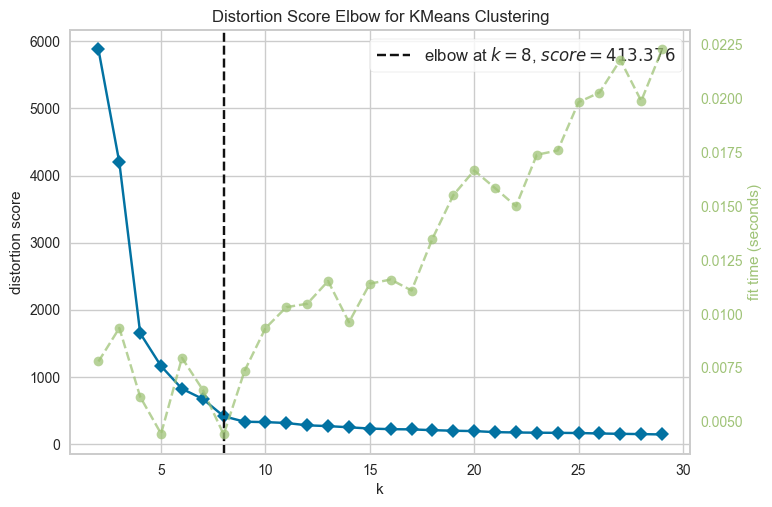

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# elbow method untuk menentukan k optimal pada data baru
visu2 = KElbowVisualizer(kmeans, k=(2, 30), locate_elbow=True)
visu2.fit(df_new)
visu2.show()

Dengan menggunakan *elbow method*, diperoleh jumlah cluster optimal sebesar 8

#### *Silhoutte score*

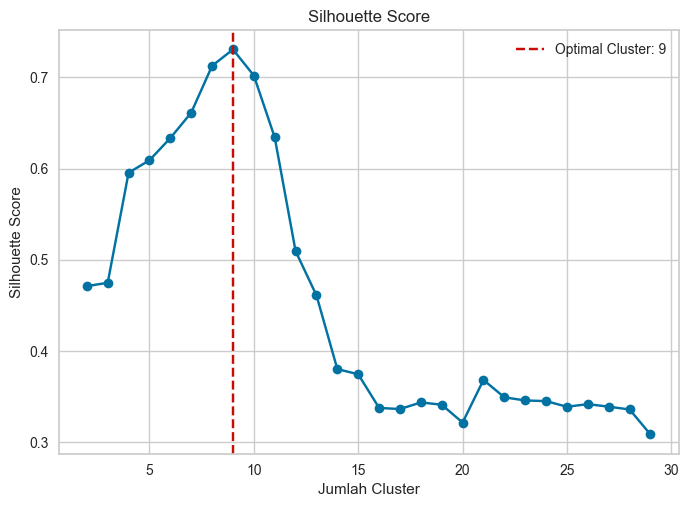

In [34]:
# silhoutte score untuk mencari k optimal pada data baru
silhouette_scores = []
n_clusters_range = range(2, 30)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df_new)
    silhouette_scores.append(silhouette_score(df_new, labels))

# Temukan jumlah cluster dengan Silhouette Score tertinggi
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]

# Plot Silhouette Score
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Tambahkan garis putus-putus merah untuk menandakan jumlah cluster optimal
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label=f'Optimal Cluster: {optimal_n_clusters}')
plt.legend()

plt.show()

Dengan menggunakan *silhoutte score*, diperoleh jumlah cluster optimal sebesar 9

### Fit model

In [35]:
# fit algoritma dengan k = 8
kmeans3 = KMeans(n_clusters = 8, init='k-means++', random_state = 42)
kmeans3.fit(df_new)

KMeans(random_state=42)

In [36]:
# fit algoritma dengan k = 9
kmeans4 = KMeans(n_clusters = 9, init='k-means++', random_state = 42)
kmeans4.fit(df_new)

KMeans(n_clusters=9, random_state=42)

### Evaluasi model menggunakan *silhoutte score*

In [37]:
silhouette_kmeans3 = silhouette_score(df_new, kmeans3.labels_)
silhouette_kmeans4 = silhouette_score(df_new, kmeans4.labels_)

print(f"Silhouette Score K=8 : {silhouette_kmeans3:.3f}")
print(f"Silhouette Score K=9 : {silhouette_kmeans4:.3f}")

Silhouette Score K=8 : 0.713
Silhouette Score K=9 : 0.730


- Penentuan jumlah cluster optimal menggunakan silhoutte score hasilnya lebih baik dibandingkan dengan *elbow method*. Ini ditunjukkan oleh nilai silhoutte score yang lebih besar.
- Nilai Silhouette Score yang mendekati 1 menunjukkan bahwa cluster-cluster yang dihasilkan oleh model terpisah dengan sangat baik. *Feature selection* telah berhasil menghilangkan fitur-fitur yang tidak relevan atau redundan, sehingga model dapat membentuk cluster yang lebih jelas dan terpisah.

### Perbandingan sebelum dan setelah *feature selection*

In [38]:
print(f"silhouette score sebelum seleksi fitur: {silhouette_kmeans2:.3f}")
print(f"silhouette score setelah seleksi fitur: {silhouette_kmeans4:.3f}")

silhouette score sebelum seleksi fitur: 0.104
silhouette score setelah seleksi fitur: 0.730


- Sebelum *feature selection* <br>
  Model memiliki performa yang buruk dengan Silhouette Score yang sangat rendah sebesar 0.104. Ini menunjukkan bahwa cluster-cluster yang dihasilkan hampir tidak terpisah dengan baik.
  
- Setelah *feature selection* <br>
  Model mengalami peningkatan performa yang signifikan dengan Silhouette Score sebesar 0.730. Ini menunjukkan bahwa cluster-cluster yang dihasilkan terpisah dengan sangat baik.

## **d. Visualisasi Hasil Clustering**

### Mnambahkan label cluster ke dalam data

In [39]:
df_clustered = df_new.copy()

df_clustered['Cluster'] = kmeans4.labels_
df_clustered['Cluster'].value_counts()

Cluster
2    2045
4    1187
1     958
0     771
3     581
5     408
6     316
7     207
8     134
Name: count, dtype: int64

### PCA

In [40]:
# reduksi dimensi data menjadi 2D menggunakan PCA
pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(df_clustered.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = df_clustered.index)

df_pca = pd.concat([df_pca, df_clustered.Cluster], axis = 1)
df_pca.head(5)

,PC_1,PC_2,Cluster
0,-0.428892,1.319033,4
1,-0.837833,-0.640483,2
2,-0.835707,-0.638108,2
3,-0.836228,-0.638198,2
4,1.121545,-1.047241,1


In [41]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.49917356 0.4695787 ]


- Komponen utama pertama (PC1) menjelaskan 49.92% dari variansi dalam data.
- Komponen utama kedua (PC2) menjelaskan 46.96% dari variansi dalam data.
- Total variansi yang dijelaskan (*total explained variance*) oleh kedua komponen utama adalah <br>
$$ 49.92\% + 46.96\% = 96.88\% $$
- Artinya 96.88% dari total variansi dalam data dapat dijelaskan oleh dua komponen utama (PC1 dan PC2). Ini menunjukkan bahwa PCA berhasil mereduksi dimensi data dengan sangat baik, karena hanya dua komponen utama yang diperlukan untuk menjelaskan hampir seluruh variansi dalam data.


### Scatter plot

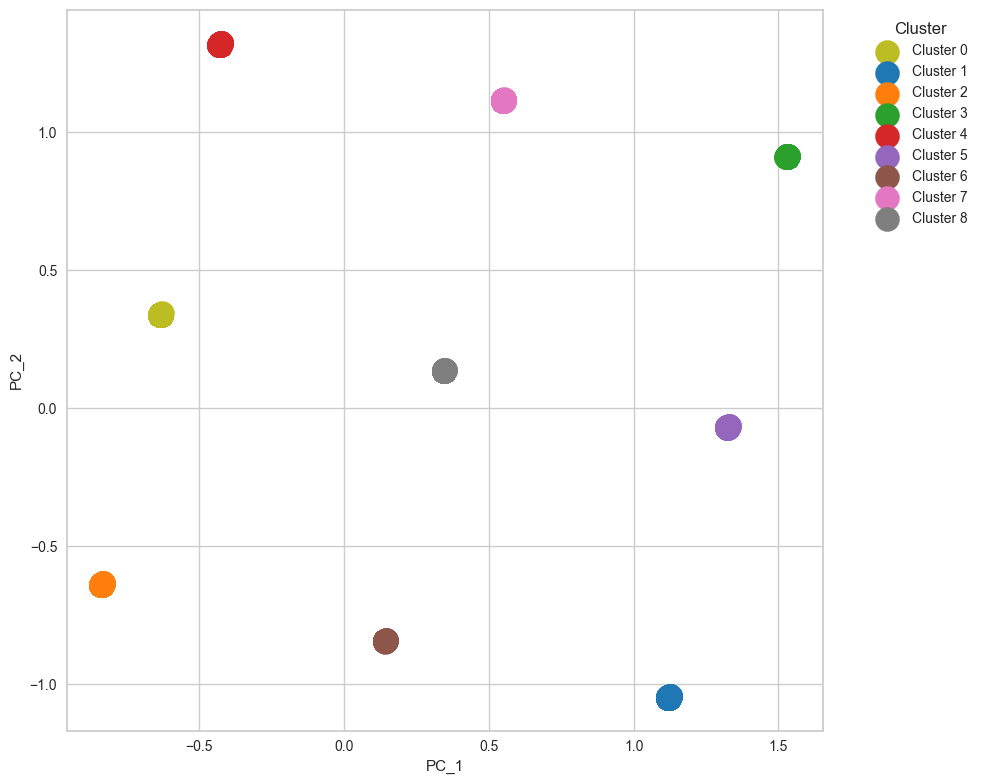

In [42]:
# palet warna 
palette = sns.color_palette("tab10", n_colors=len(df_pca['Cluster'].unique()))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

# scatter plot hasil clustering
for cluster in sorted(df_pca['Cluster'].unique()):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    ax.scatter(cluster_data['PC_1'], cluster_data['PC_2'],
               label=f'Cluster {cluster}',
               s=300,
               color=palette[cluster - 1])

ax.set_xlabel('PC_1')
ax.set_ylabel('PC_2')
ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dari scatter plot di atas, dapat dilihat banyak titik data yang "berkelompok" di satu titik atau area tertentu, sehingga visualisasi ini terlihat lebih seperti beberapa titik saja. Ini menunjukkan bahwa setiap cluster memiliki kesamaan karakteristik yang kuat di kedua dimensi utama.

## **e. Analisis dan Interpretasi Hasil Cluster**

In [43]:
# inverse transform kolom numerik
df[numerical_cols] = scl.inverse_transform(df[numerical_cols])

In [44]:
# inverse transform kolom kategorik
for col in categorical_cols:
    le.fit(data[col])
    df[col] = le.inverse_transform(df[col])

In [45]:
df['Cluster'] = kmeans4.labels_

In [46]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,...,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0,4
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,...,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0,2
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,...,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0,2
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,...,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0,2
4,19.0,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,...,High,Public,Neutral,4.0,No,College,Near,Female,70.0,1


In [47]:
# Analisis karakteristik tiap cluster
cluster_analysis = df.groupby('Cluster').agg({
    'Hours_Studied': ['min', 'max', 'mean'],
    'Tutoring_Sessions': ['min', 'max', 'mean'],
    'Exam_Score': ['min', 'max', 'mean'],
    'Access_to_Resources': lambda x: x.mode()[0],
    'Teacher_Quality': lambda x: x.mode()[0]
})

In [48]:
cluster_analysis

Hours_Studied                  Tutoring_Sessions                 \
                  min   max       mean               min  max      mean   
Cluster                                                                   
0                 2.0  38.0  20.106355               0.0  6.0  1.518807   
1                 2.0  43.0  19.887265               0.0  7.0  1.532359   
2                 1.0  39.0  19.863081               0.0  7.0  1.485086   
3                 2.0  39.0  19.845095               0.0  7.0  1.423408   
4                 1.0  39.0  20.145746               0.0  6.0  1.490312   
5                 3.0  44.0  20.164216               0.0  8.0  1.514706   
6                 4.0  38.0  20.234177               0.0  6.0  1.525316   
7                 2.0  39.0  19.560386               0.0  5.0  1.478261   
8                 9.0  32.0  20.074627               0.0  5.0  1.425373   

        Exam_Score                   Access_to_Resources Teacher_Quality  
               min    max       mean            <lambda>        <lambda>  
Cluster                                                                   
0             55.0   89.0  65.976654                 Low          Medium  
1             58.0  100.0  67.593946              Medium            High  
2             58.0  100.0  66.973105              Medium          Medium  
3             59.0   95.0  68.447504                High            High  
4             56.0   99.0  68.048863                High          Medium  
5             58.0   98.0  66.772059                 Low            High  
6             58.0   94.0  66.781646              Medium             Low  
7             58.0   91.0  67.342995                High             Low  
8             59.0   88.0  65.776119                 Low             Low

> ### Interpretasi

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

**Cluster 0**
- **Hours_Studied:** 2.0 - 38.0 (Rata-rata: 20.11)
- **Tutoring_Sessions:** 0.0 - 6.0 (Rata-rata: 1.52)
- **Exam_Score:** 55.0 - 89.0 (Rata-rata: 65.98)
- **Access_to_Resources:** Low
- **Teacher_Quality:** Medium
- **Analisis:** Siswa dalam cluster ini memiliki jam belajar yang cukup tinggi, tetapi nilai ujian mereka cenderung menengah. Akses terbatas ke sumber daya pendidikan dan kualitas guru yang sedang mungkin menjadi faktor penghambat.

**Cluster 1**
- **Hours_Studied:** 2.0 - 43.0 (Rata-rata: 19.89)
- **Tutoring_Sessions:** 0.0 - 7.0 (Rata-rata: 1.53)
- **Exam_Score:** 58.0 - 100.0 (Rata-rata: 67.59)
- **Access_to_Resources:** Medium
- **Teacher_Quality:** High
- **Analisis:** Siswa dalam cluster ini memiliki nilai ujian yang lebih tinggi meskipun jam belajar mereka sedikit lebih rendah. Kualitas guru yang tinggi dan akses sumber daya yang sedang mungkin membantu mereka mencapai hasil yang lebih baik.

**Cluster 2**
- **Hours_Studied:** 1.0 - 39.0 (Rata-rata: 19.86)
- **Tutoring_Sessions:** 0.0 - 7.0 (Rata-rata: 1.49)
- **Exam_Score:** 58.0 - 100.0 (Rata-rata: 66.97)
- **Access_to_Resources:** Medium
- **Teacher_Quality:** Medium
- **Analisis:** Siswa dalam cluster ini memiliki akses sumber daya yang sedang dan kualitas guru yang sedang. Nilai ujian mereka sedikit lebih rendah, menunjukkan bahwa mereka mungkin memerlukan pendekatan belajar yang lebih efektif.

**Cluster 3**
- **Hours_Studied:** 2.0 - 39.0 (Rata-rata: 19.85)
- **Tutoring_Sessions:** 0.0 - 7.0 (Rata-rata: 1.42)
- **Exam_Score:** 59.0 - 95.0 (Rata-rata: 68.45)
- **Access_to_Resources:** High
- **Teacher_Quality:** High
- **Analisis:** Siswa dalam cluster ini memiliki nilai ujian yang lebih tinggi meskipun sesi bimbingan belajar yang lebih sedikit. Akses sumber daya yang tinggi dan kualitas guru yang tinggi mungkin membantu mereka mencapai hasil yang lebih baik.

**Cluster 4**
- **Hours_Studied:** 1.0 - 39.0 (Rata-rata: 20.15)
- **Tutoring_Sessions:** 0.0 - 6.0 (Rata-rata: 1.49)
- **Exam_Score:** 56.0 - 99.0 (Rata-rata: 68.05)
- **Access_to_Resources:** High
- **Teacher_Quality:** Medium
- **Analisis:** Siswa dalam cluster ini memiliki jam belajar yang tinggi dan nilai ujian yang cukup tinggi. Akses sumber daya yang tinggi mungkin membantu, meskipun kualitas guru yang sedang.

**Cluster 5**
- **Hours_Studied:** 3.0 - 44.0 (Rata-rata: 20.16)
- **Tutoring_Sessions:** 0.0 - 8.0 (Rata-rata: 1.51)
- **Exam_Score:** 58.0 - 98.0 (Rata-rata: 66.77)
- **Access_to_Resources:** Low
- **Teacher_Quality:** High
- **Analisis:** Siswa dalam cluster ini memiliki jam belajar yang tinggi, tetapi nilai ujian mereka sedikit lebih rendah. Kualitas guru yang tinggi mungkin membantu, tetapi akses terbatas ke sumber daya pendidikan menjadi faktor penghambat.

**Cluster 6**
- **Hours_Studied:** 4.0 - 38.0 (Rata-rata: 20.23)
- **Tutoring_Sessions:** 0.0 - 6.0 (Rata-rata: 1.53)
- **Exam_Score:** 58.0 - 94.0 (Rata-rata: 66.78)
- **Access_to_Resources:** Medium
- **Teacher_Quality:** Low
- **Analisis:** Siswa dalam cluster ini memiliki jam belajar yang sangat tinggi, tetapi nilai ujian mereka berada di kisaran menengah. Kualitas guru yang rendah mungkin menjadi tantangan bagi mereka.

**Cluster 7**
- **Hours_Studied:** 2.0 - 39.0 (Rata-rata: 19.56)
- **Tutoring_Sessions:** 0.0 - 5.0 (Rata-rata: 1.48)
- **Exam_Score:** 58.0 - 91.0 (Rata-rata: 67.34)
- **Access_to_Resources:** High
- **Teacher_Quality:** Low
- **Analisis:** Siswa dalam cluster ini memiliki jam belajar yang lebih rendah dan nilai ujian yang menengah. Akses sumber daya yang tinggi mungkin membantu, tetapi kualitas guru yang rendah menjadi faktor penghambat.

**Cluster 8**
- **Hours_Studied:** 9.0 - 32.0 (Rata-rata: 20.07)
- **Tutoring_Sessions:** 0.0 - 5.0 (Rata-rata: 1.43)
- **Exam_Score:** 59.0 - 88.0 (Rata-rata: 65.78)
- **Access_to_Resources:** Low
- **Teacher_Quality:** Low
- **Analisis:** Siswa dalam cluster ini memiliki jam belajar yang cukup tinggi, tetapi nilai ujian mereka cenderung rendah. Akses terbatas ke sumber daya pendidikan dan kualitas guru yang rendah mungkin menjadi faktor penghambat utama.

> ### Kesimpulan

1. **Faktor jam belajar dan sesi bimbingan belajar**
   - Siswa dengan jam belajar yang tinggi (seperti pada **Cluster 4** dan **Cluster 6**) cenderung memiliki nilai ujian yang cukup tinggi, meskipun hasilnya belum maksimal jika tidak didukung oleh kualitas guru yang baik.
   - Siswa dengan jam belajar yang lebih rendah (seperti pada **Cluster 7** dan **Cluster 8**) memiliki nilai ujian yang menengah hingga rendah, menunjukkan bahwa mereka mungkin memerlukan lebih banyak waktu dan dukungan untuk meningkatkan hasil belajar.

2. **Pengaruh akses ke sumber daya pendidikan**
   - Siswa dengan akses tinggi ke sumber daya pendidikan (seperti pada **Cluster 3** dan **Cluster 4**) cenderung memiliki nilai ujian yang lebih baik.
   - Siswa dengan akses terbatas ke sumber daya pendidikan (seperti pada **Cluster 0**, **Cluster 5**, dan **Cluster 8**) menghadapi tantangan lebih besar dalam mencapai nilai ujian yang tinggi.

3. **Peran kualitas guru**
   - Kualitas guru yang tinggi (seperti pada **Cluster 1**, **Cluster 3**, dan **Cluster 5**) berkorelasi dengan nilai ujian yang lebih baik.
   - Kualitas guru yang rendah (seperti pada **Cluster 6**, **Cluster 7**, dan **Cluster 8**) menjadi faktor penghambat utama, bahkan bagi siswa yang memiliki jam belajar tinggi.

4. **Karakteristik unik setiap cluster**
   - **Cluster 0: The Resource-Limited Strivers** <br>
      Siswa yang berusaha keras tetapi terhambat oleh akses terbatas ke sumber daya dan kualitas guru yang sedang.
   - **Cluster 1: The Balanced High Performers** <br>
      Siswa yang seimbang dalam usaha dan hasil, didukung oleh kualitas guru yang tinggi.
   - **Cluster 2: The Resource-Rich Moderate Achievers** <br>
      Siswa dengan akses sumber daya yang sedang, tetapi memerlukan pendekatan belajar yang lebih efektif.
   - **Cluster 3: The Independent Top Achievers** <br>
      Siswa mandiri yang mencapai hasil tinggi meskipun dengan sesi bimbingan belajar yang lebih sedikit.
   - **Cluster 4: The Hardworking Strategists** <br>
      Siswa yang bekerja keras dan memiliki strategi belajar yang efektif.
   - **Cluster 5: The High-Effort, Low-Support Group** <br>
      Siswa yang berusaha keras tetapi kurang didukung oleh kualitas guru yang rendah.
   - **Cluster 6: The Overworked Moderate Performers** <br>
      Siswa yang menghabiskan banyak waktu untuk belajar tetapi hasilnya belum optimal karena kualitas guru yang rendah.
   - **Cluster 7: The Under-Resourced Strugglers** <br>
      Siswa dengan jam belajar yang lebih rendah dan nilai ujian yang menengah, terhambat oleh kualitas guru yang rendah.
   - **Cluster 8: The Low-Support, Low-Performance Group** <br>
      Siswa yang menghadapi tantangan besar karena keterbatasan sumber daya dan kualitas guru yang rendah.

> ### Kesimpulan akhir

Analisis ini menunjukkan bahwa **jam belajar**, **akses ke sumber daya pendidikan**, dan **kualitas guru** merupakan faktor kunci yang memengaruhi hasil belajar siswa. Setiap cluster memiliki karakteristik unik yang memerlukan pendekatan berbeda untuk meningkatkan hasil belajar. Dengan memahami karakteristik ini, pihak sekolah atau lembaga pendidikan dapat merancang intervensi yang lebih tepat sasaran untuk membantu siswa mencapai potensi maksimal mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [49]:
# data asli yang belum melalui pre processing
data = pd.read_csv('dataset_clustering.csv')

In [50]:
data['Cluster'] = kmeans4.labels_

In [51]:
data.to_csv("dataset_klasifikasi.csv", index=False)